### 2111961 문수정 시계열스터디 과제 CH02

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 평균절대백분율오차구하기

In [2]:
def mape(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true) * 100

## 데이터집합 로딩

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')

## 훈련 데이터 집합, 테스트 데이터 집합 분할

In [4]:
train = df[:-4].copy()
test = df[-4:].copy()
print(test)

          date   data
80  1980-01-01  16.20
81  1980-04-01  14.67
82  1980-07-02  16.02
83  1980-10-01  11.61


## 마지막 측정된 값으로 예측하는 베이스라인 모델 구현

In [5]:
last = train.data.iloc[-1]
print(last)

9.99


In [6]:
test.loc[:, 'pred_last'] = last

In [7]:
mape_last = mape(test['data'], test['pred_last'])
print(mape_last)

30.457277908606535


## 시각화(2.9 재현)

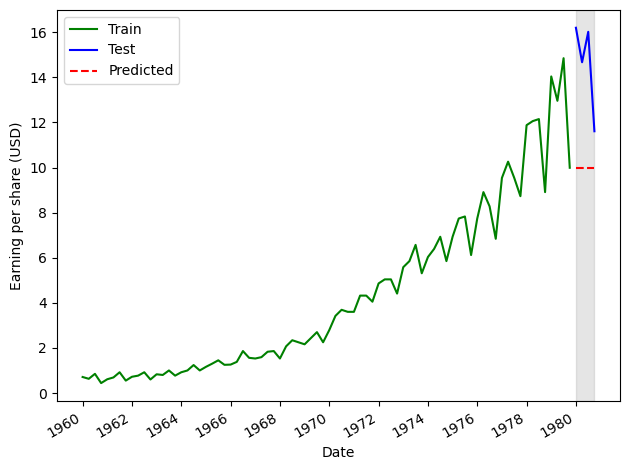

In [8]:
fig, ax = plt.subplots()
 
ax.plot(train['date'], train['data'], 'g-', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'],'r--', label='Predicted')

ax.set_xlabel('Date')
ax.set_ylabel('Earning per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()